# Tutorial WW3 com bmi_wavewatch3 em Python

O WAVEWATCH III® é "um framework de modelagem de ondas que inclui os mais recentes avanços científicos no campo de modelagem e dinâmica de ondas geradas pelo vento". Sua documentação e manual de uso podem ser encontrados em https://github.com/NOAA-EMC/WW3/wiki/WAVEWATCH-III-User-Guide.

Como seu código está escrito em Fortran 90, este notebook busca apresentar, de maneira pedagógica, os fundamentos de como utilizar o WW3 com uma linguagem de programação mais acessível, como Python. Buscando se ater ao objetivo mencionado, os exemplos desenvolvido se limitam a 1) Visualizar dados de uma variável oceanográfica em um momento e região específica; e 2) obter a altura significativa máxima em uma data específica.

## Sumário

1. [Instalação](#1) <br />
    1.1 [Bugfix no Windows ](#1.1) <br>
2. [Introduzindo o bmi-wavewatch](#2) <br>
    2.1 [Dados de um Mês](#2.1) <br>
    2.2 [Dados de uma Data Variable](#2.2) <br>
    2.3 [Propriedade "step"](#2.3) <br>
    2.4 [Alturas Signifificativas em Data Específica](#2.4) <br>
    2.5 [Plotando Gráficos](#2.5) <br>
3. [Analisando Dados do WW3 com bmi_wavewatch3](#3) <br>
    3.1 [Visualizando a Altura Significativa na América do Sul](#3.1) <br>
    3.2 [Obtendo a Altura Significativa Máxima em Data Específica ](#3.2) <br>

## 1) Instalação <a name="1"></a>

Para facilitar o gerenciamento de packages, recomenda-se a utilização da distribuição Anaconda (ver https://www.anaconda.com/). Então, conforme especificado em https://bmi-wavewatch3.readthedocs.io/en/latest/install/source_install.html, deve-se instalar (ver https://docs.anaconda.com/navigator/tutorials/manage-packages/) o package bmi_wavewatch3 (ver https://github.com/csdms/bmi-wavewatch3). 

### 1.1) Bugfix no Windows <a name="1.1"></a>

Recomenda-se <b>fortemente</b> a utilização de Linux para lidar com dados oceanográficos. Se não for possível, uma maneira (nada confiável) que encontrei de de garantir o funcionamento do bmi_wavewatch3 inicializando o cfgrib (package que permite a interface com arquivos grib em python, ver https://github.com/ecmwf/cfgrib) sem erros com o ecccodes (package que instala arquivos grib, ver https://github.com/ecmwf/eccodes) é executando a cédula a seguir:

In [10]:
from bmi_wavewatch3 import WaveWatch3
import xarray as xr
import cfgrib

ww3 = WaveWatch3("2009-11-08")

_ = xr.open_mfdataset(
    [ww3._cache / url.filename for url in ww3._urls],
    engine="cfgrib",
    parallel=False,
)

Essa cédula resolve o problema porque inicializa o xarray sem utilizar paralelismo (que é o que causa os problemas na biblioteca bmi_wavewatch3 em windows, ver https://github.com/ecmwf/cfgrib/issues/110). Espera-se que isso seja alterado no futuro.

## 2) Introduzindo o bmi-wavewatch3 <a name="2"></a>

Sua documentação pode ser encontrada em https://bmi-wavewatch3.readthedocs.io/en/latest/ e o código open source https://github.com/csdms/bmi-wavewatch3/tree/cc1e0ec06b0cccaca4bc99af564c497c603c84d2/src/bmi_wavewatch3. 

O que a biblioteca faz é bastante simples:
1) Faz uma requisição para obter os dados do Wavewatch3 de um determinado mês armazenados em https://polar.ncep.noaa.gov/
2) Salva os dados no computador do usuário ("cache"). Se o usuário fizer a requisição para o mesmo mês no futuro, os dados armazenados no cache são retornados (sem demandar uma requisição)
3) Transforma os dados em grib (que são pouco acessíveis, ver https://en.wikipedia.org/wiki/GRIB) em primeiramente netCFD (https://www.unidata.ucar.edu/software/netcdf/) e então em xarray.Dataset (ver https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html). 

xarray.Dataset é uma abstração voltada para dados oceanográficos, desenvolvida a partir de arrays em numpy (ver https://numpy.org/doc/stable/reference/generated/numpy.array.html) e dataframes em pandas (ver https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). A partir do momento que os dados são obtidos com o bmi_wavewatch3, qualquer análise subsequente vai demanar um conhecimento do xarray.Dataset - portanto recomenda-se <b>fortemente</b> o estudo aprofundado da biblioteca xarray (https://docs.xarray.dev/en/stable/) e, se necessário, de arrays em numpy e DataFrames em pandas.

Para entender melhor o uso da biblioteca, recomenda-se o artigo https://towardsdatascience.com/what-is-netcdf-data-and-why-is-it-interesting-ec26bcece19d.

### 2.1) Dados de um Mês <a name="2.1"></a>

In [12]:
from bmi_wavewatch3 import WaveWatch3

ww3 = WaveWatch3("2009-11-08")

ww3.data # Um xarray.Dataset contendo dados do mês de novembro de 2009

<xarray.Dataset>
Dimensions:     (step: 241, latitude: 311, longitude: 720)
Coordinates:
    time        datetime64[ns] 2009-11-01
  * step        (step) timedelta64[ns] 0 days 00:00:00 ... 30 days 00:00:00
    surface     float64 1.0
  * latitude    (latitude) float64 77.5 77.0 76.5 76.0 ... -76.5 -77.0 -77.5
  * longitude   (longitude) float64 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
    valid_time  (step) datetime64[ns] dask.array<chunksize=(241,), meta=np.ndarray>
Data variables:
    dirpw       (step, latitude, longitude) float32 dask.array<chunksize=(241, 311, 720), meta=np.ndarray>
    perpw       (step, latitude, longitude) float32 dask.array<chunksize=(241, 311, 720), meta=np.ndarray>
    swh         (step, latitude, longitude) float32 dask.array<chunksize=(241, 311, 720), meta=np.ndarray>
    u           (step, latitude, longitude) float32 dask.array<chunksize=(241, 311, 720), meta=np.ndarray>
    v           (step, latitude, longitude) float32 dask.array<chunksize=(241, 311, 720), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-03-02T21:19 GRIB to CDM+CF via cfgrib-0.9.1...

Grosso modo, para os dados obtidos com o bmi_wavewatch3:

<ul>
    <li><b>Coordinates</b> armezanam dados referentes às listas de coordenadas (latitudes e longitudes) e outros dados menos importantes como por exemplo o dia (time) e o step (que será explicado em detalhe mais abaixo) inicial (0) </li>
    <li><b>Dimensions</b> armazenam a quantidade de coordenadas para latitude, longitude e step - se por exemplo temos uma lista de latitudes [-40, -30], longitudes [40, 20, 30] e steps [0, 201929], as dimensões serão 2, 3 e 2, respectivamente. 
    </li>
        <li><b>Data variables</b> armazenam dados (no formato xArray.DataArray) referentes a variáveis específicas para as coordenadas (Coordinates, como definido acima) do xarray.Dataset (como a altura significativa, ou velocidade do vento)</li>
     <li><b>Attributes</b> armazenam metadados dos dados obtidos - o tipo de arquivo obtido, unidades, etc... </li>
</ul>
 
Podemos obter esses dados em formatos mais conhecidos em Python:

In [43]:
for data_variable_name in ww3.data.variables:
    print(f"Nome da variável: {data_variable_name}")
    
    # Cada Data Variable é um xarray.Variable
    # Na prática, como mencionado, vamos acessar as Data variables
    # como xarray.DataArray (como veremos nas próximas cédulas)
    xarray_variable = ww3.data[data_variable_name] 
    
    # Acessamos os "Attributes" do xarray.Variable
    data_variable_long_name = xarray_variable.attrs["long_name"]
    print(f"Que representa: {data_variable_long_name}")
    print("\n")


Nome da variável: time
Que representa: initial time of forecast


Nome da variável: step
Que representa: time since forecast_reference_time


Nome da variável: surface
Que representa: original GRIB coordinate for key: level(surface)


Nome da variável: latitude
Que representa: latitude


Nome da variável: longitude
Que representa: longitude


Nome da variável: valid_time
Que representa: time


Nome da variável: dirpw
Que representa: Primary wave direction


Nome da variável: perpw
Que representa: Primary wave mean period


Nome da variável: swh
Que representa: Significant height of combined wind waves and swell


Nome da variável: u
Que representa: U component of wind


Nome da variável: v
Que representa: V component of wind




### 2.2) Dados de uma Data Variable <a name="2.2"></a>

Nesse caso, vamos obter os dados da altura significativa (swh = Significante Wave Height). Podemos obter uma Data variable de duas maneiras distintas:

In [48]:
ww3.data.swh
ww3.data.variables["swh"]

<xarray.Variable (step: 241, latitude: 311, longitude: 720)>
dask.array<open_dataset-7acc8270c923294e942878c3a578cdc0swh, shape=(241, 311, 720), dtype=float32, chunksize=(241, 311, 720), chunktype=numpy.ndarray>
Attributes: (12/29)
    GRIB_paramId:                             140229
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      223920
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Significant height of combined ...
    GRIB_shortName:                           swh
    GRIB_units:                               m
    long_name:                                Significant height of combined ...
    units:                                    m
    standard_name:                            unknown

In [47]:
# Primary wave direction
ww3.data.dirpw
ww3.data["dirpw"]

<xarray.DataArray 'dirpw' (step: 241, latitude: 311, longitude: 720)>
dask.array<open_dataset-592fea7292fe2c8bc41944040a44ceecdirpw, shape=(241, 311, 720), dtype=float32, chunksize=(241, 311, 720), chunktype=numpy.ndarray>
Coordinates:
    time        datetime64[ns] 2009-11-01
  * step        (step) timedelta64[ns] 0 days 00:00:00 ... 30 days 00:00:00
    surface     float64 1.0
  * latitude    (latitude) float64 77.5 77.0 76.5 76.0 ... -76.5 -77.0 -77.5
  * longitude   (longitude) float64 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
    valid_time  (step) datetime64[ns] dask.array<chunksize=(241,), meta=np.ndarray>
Attributes: (12/29)
    GRIB_paramId:                             260233
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      223920
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Primary wave direction
    GRIB_shortName:                           dirpw
    GRIB_units:                               Degree true
    long_name:                                Primary wave direction
    units:                                    Degree true
    standard_name:                            unknown

Nota-se também que os dados do xarray.DataArray propriamente ditos (que representam, para o exemplo do último caso, a "Primary wave direction" para diferentes steps (ver abaixo), latitudes e longitudes) são obtidos a partir da propriedade "values":

In [55]:
# Array multidimensional com valores de Primary wave direction para steps, latitudes e longitudes correspondentes
# _ = ww3.data["dirpw"].values # Comentado porque demora pra se obter

### 2.3) Propriedade "step"  <a name="2.3"></a>

Embora seja um pouco confuso, a propriedade <b>step</b> é a variável que representa a marcação do tempo no bmi_wavewatch3. O step representa o "número de incrementos de 3 horas passados desde o início do mês". Então se os dados foram obtidos para, digamos, 2009-11-08 (8 novembro de 2009), então:

step = 3 -> 3x3=9 horas após 00h de 2009-01-01 -> 2009-01-01, 9h <br />
step = 10 -> 10x3=30 horas após 00h de 2009-01-01 -> 2009-01-02 6h <br />
step = 21 -> 20x3=60 horas após 00h de 2009-01-01 -> 2009-01-03 15h <br />
etc...


O step é iniciado como 0. Quando se obtêm os dados de um dia específico, por exemplo 2009-11-08, o step é alterado para corresponder ao início daquele dia. Portanto, para:

ww3 = WaveWatch3("2009-11-08") -> ww3.step == 56 -> 56*3horas = 168 horas = 7 dias

In [49]:
from bmi_wavewatch3 import WaveWatch3

ww3 = WaveWatch3("2009-11-08")
print("Número de incrementos de 3 horas passados desde o início do mês: ", ww3.step)
print("0, zero! Porque os dados ainda não foram requisitados.")
print("Requisitando dados...")

ww3.data # Dados são requisitados

print("\n")
print("Depois dos dados serem requisitados:")
print("Número de incrementos de 3 horas passados desde o início do mês: ", ww3.step)

Número de incrementos de 3 horas passados desde o início do mês:  0
0, zero! Porque os dados ainda não foram requisitados.
Requisitando dados...


Depois dos dados serem requisitados:
Número de incrementos de 3 horas passados desde o início do mês:  56


A próxima seção esclarecerá a função do step!

### 2.4) Alturas Signifificativas em Data Específica  <a name="2.4"></a>

In [50]:
from bmi_wavewatch3 import WaveWatch3

ww3 = WaveWatch3("2009-11-08")

# "da" é uma abreviação de "DataArray"
# Importante lembrar que esse DataArray irá conter dados da altura significativa
# para O MÊS INTEIRO de novembro (11) de 2009
da = ww3.data.swh



Repetindo, porque é fundamental: o xArray.DataArray "da" irá armazenar dados da altura significativa ("swh") para <b>O MÊS INTEIRO de novembro (11) de 2009</b>. Para se obter dados referentes ao dia especificado ("2009-11-08"), deve-se então utilizar o step:

In [52]:

# A operação [ww3.step, :, :] abaixo é uma maneira de se obter dados de arrays multidimensionais!
da = ww3.data.swh[ww3.step, :, :] 
da # Simplesmente uma cópia de ww3.data.swh, mas com step iniciando em ww3.step (56, como visto acima)

<xarray.DataArray 'swh' (latitude: 311, longitude: 720)>
dask.array<getitem, shape=(311, 720), dtype=float32, chunksize=(311, 720), chunktype=numpy.ndarray>
Coordinates:
    time        datetime64[ns] 2009-11-01
    step        timedelta64[ns] 7 days
    surface     float64 1.0
  * latitude    (latitude) float64 77.5 77.0 76.5 76.0 ... -76.5 -77.0 -77.5
  * longitude   (longitude) float64 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
    valid_time  datetime64[ns] dask.array<chunksize=(), meta=np.ndarray>
Attributes: (12/29)
    GRIB_paramId:                             140229
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      223920
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Significant height of combined ...
    GRIB_shortName:                           swh
    GRIB_units:                               m
    long_name:                                Significant height of combined ...
    units:                                    m
    standard_name:                            unknown

Agora sim: temos um xarray.DataArray representando os dados das 00h do dia "2009-11-08", como especificado. Mas e se quisermos não as 00h, mas às 06h? 

Bom, teremos que aumentar o step em 2 (2x3horas = 6 horas). Veja:

In [61]:
da_2009_11_08_06h = ww3.data.swh[ww3.step+2, :, :]  # Dados de 06h do dia "2009-11-08"
da_2009_11_08_06h

<xarray.DataArray 'swh' (latitude: 311, longitude: 720)>
dask.array<getitem, shape=(311, 720), dtype=float32, chunksize=(311, 720), chunktype=numpy.ndarray>
Coordinates:
    time        datetime64[ns] 2009-11-01
    step        timedelta64[ns] 7 days 06:00:00
    surface     float64 1.0
  * latitude    (latitude) float64 77.5 77.0 76.5 76.0 ... -76.5 -77.0 -77.5
  * longitude   (longitude) float64 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
    valid_time  datetime64[ns] dask.array<chunksize=(), meta=np.ndarray>
Attributes: (12/29)
    GRIB_paramId:                             140229
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      223920
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Significant height of combined ...
    GRIB_shortName:                           swh
    GRIB_units:                               m
    long_name:                                Significant height of combined ...
    units:                                    m
    standard_name:                            unknown

E se quisermos os dados de algum outro momento específico, como 01:30h? Poderíamos tentar fazer: <br />

In [63]:
# da_2009_11_08_06h = ww3.data.swh[ww3.step+0.5, :, :]  # Dados de 01:30h do dia "2009-11-08"

No entanto isso causaria um <b>erro!</b> Os dados do Wavewatch3 que estamos buscando são disponibilizados para um conjunto de latitudes e longitudes a cada 3 horas (como especificado em https://polar.ncep.noaa.gov/waves/hindcasts/prod-multi_1.php). Por isso o valor do step corrresponde a 3 horas - não é arbitrário.  

### 2.5) Plotando Gráficos  <a name="2.5"></a>

Como xarray.DataArray são abstrações em cima de DataFrames do pandas, podemos plotá-los simplesmente fazendo:

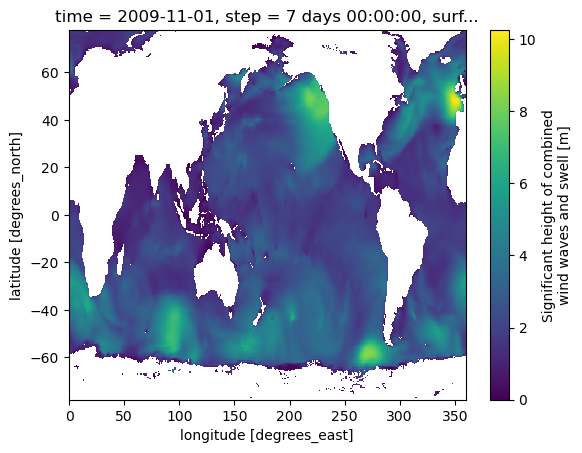

In [56]:
from bmi_wavewatch3 import WaveWatch3

ww3 = WaveWatch3("2009-11-08")

da = ww3.data.swh[ww3.step, :, :]
_  = da.plot()

## 3) Analisando Dados do WW3 com bmi_wavewatch3  <a name="3"></a>

Como depreende-se do apresentado nas últimas seções, analisar dados do bmi_wavewatch3 consiste basicamente em manipular dados em estruturas de dados do package xarray que foram requisitados pelo bmi_wavewatch3. Vamos apresentar dois exemplos simples:

### 3.1) Visualizando a Altura Significativa na América do Sul  <a name="3.1"></a>

Para limitar a visualização dos dados a uma região específica, primeiramente seguimos os passos explicados em seções anteriores:
1) Utilizando o package bmi_wavewatch3, obtemos os dados de um determinado mês;
2) Utilizando a propriedade ww3.step e transformando arrays multidimensionais, específicamos o dia e hora desejados

E o processo de limitar a região consiste em especificar as latitudes e longitudes máximas e mínimas e construir um novo xarray.DataArray apenas com latitudes e longitudes que satisfazem as condições especificadas (lembrando que xarray.DataArray são abstrações em cima de DataFrames em pandas, ver https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). Essa transformação é realizada com o conceito de "máscaras" (ver https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html).



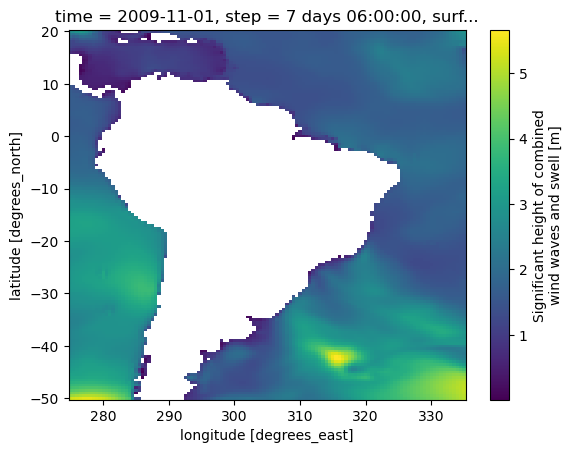

In [65]:
from bmi_wavewatch3 import WaveWatch3

ww3 = WaveWatch3("2009-11-08")

# xarray.DataArray das 06h de "2009-11-08"
da_2009_11_08_06h = ww3.data.swh[ww3.step+2, :, :] 

# Latitudes e longitudes mínimas e máximas
min_lon, max_lon = 275, 335 # Longitude mínima e máxima
min_lat, max_lat = -50, 20 # Latitude mínima e máxima

# Construindo "máscaras" que restringem o xarray.DataArray às latitudes e longitudes especificadas
mask_lon = (da_2009_11_08_06h.longitude >= min_lon) & (da_2009_11_08_06h.longitude <= max_lon)
mask_lat = (da_2009_11_08_06h.latitude >= min_lat) & (da_2009_11_08_06h.latitude <= max_lat)

# Aplicando as máscaras no xarray.DataArray
da_constraint_to_minmax_latlon = da_2009_11_08_06h.where(mask_lon & mask_lat, drop=True)
_ = da_constraint_to_minmax_latlon.plot()


### 3.2) Obtendo a Altura Significativa Máxima em Data Específica  <a name="3.2"></a>


O procedimento é essencialmente o mesmo: obtêm-se os dados, utiliza-se numpy ou pandas para manipulá-los de modo a se obter o dado específico.

In [77]:
from bmi_wavewatch3 import WaveWatch3
import numpy as np

ww3 = WaveWatch3("2009-11-08")

# xarray.DataArray das 18h de "2009-11-08"
da_2009_11_08_18h = ww3.data.swh[ww3.step+9, :, :] 

# "max()"" obtém o valor máximo do xarray.DataArray como xarray.DataArray
# ".values" obtém os valores como um array em numpy
# ".item()" transforma o array em numpy em float
max_swh_2009_11_08_18h = da_2009_11_08_18h.max().values.item()

print(f"A altura significativa máxima no planeta terra às 18g de 8 de novembro de 2009 foi: {round(max_swh_2009_11_08_18h, 3)} metros")

A altura significativa máxima no planeta terra às 18g de 8 de novembro de 2009 foi: 8.48 metros
